# What is a Decision Tree?

## Introduction

A Decision Tree is a machine learning technique that is used classify data. Given a set of training data, it learn parameters and decision rules which it will use to split the data. When the new fitted function is applied to testing data, the output will which classification bin the data falls into. The use of decision rules allows for a direct view into how the model is making its decisions. However, if a decision tree has many decision rules, it may be hard to interpret.  




## Parameters for the model

While certain classification methods such as logistic regression do not require input parameters, a Decision Tree requires some input by the modeler.

The parameters include

*   Max Depth: this parameter restricts how many decision rules can be used to be used in a classification group.
*   Mininum samples split: the minimum number of samples required to split an internal node.
*   Max features: the maximum number of features to consider when looking for the best decision rule at a node. Placing a limit on this number can help interpretability.
* Max leaf nodes: limits the number of leaves of the tree. These leaves represent the classification groups.

A common theme with these parameters is that modelers may pick parameters that will lead to less optimal predictions in order to get more interpretable answers.




# Code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = r"C:\Users\pjs5\Downloads\drive-download-20250503T205017Z-1-001\diabetes_dataset_with_notes.csv"
df = pd.read_csv(filename)

This dataset is heavily imbalanced as the vast majority of people do not have diabetes and only a small percentage do. Thus, we evaluate the model performance on Unbalanced data and Balanced data.

## Unbalanced training set

Accuracy: 0.9717
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       1.00      0.67      0.80      1703

    accuracy                           0.97     20000
   macro avg       0.98      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000



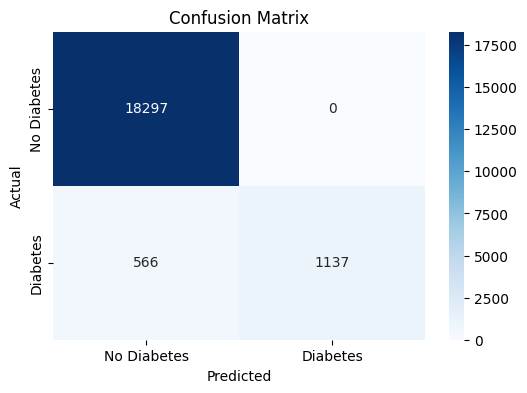

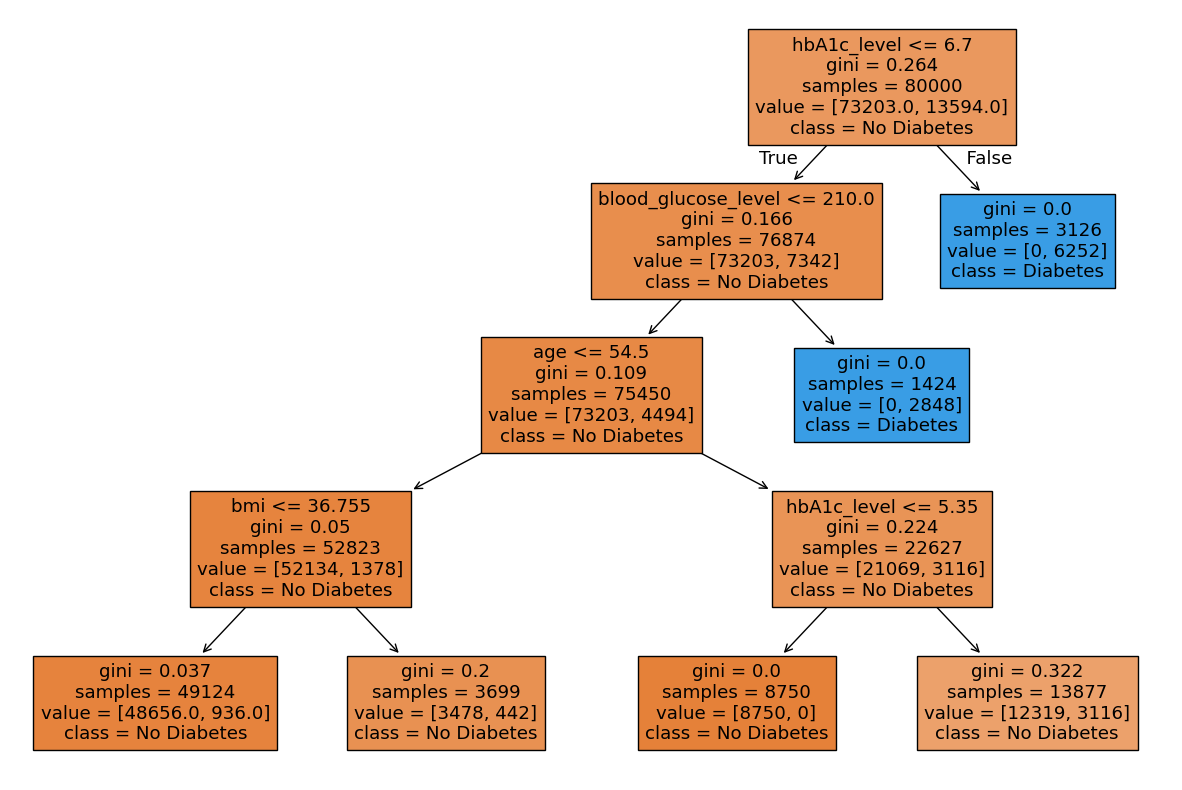

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
# df = df.drop(columns=['year', 'clinical_notes'])
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv(filename)  # No need for encoding issues with Excel files
df = df.drop(columns=['year', 'clinical_notes'])

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight={0: 1, 1: 2} )
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

## Balanced training set

Accuracy: 0.7994
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.79      0.88     18297
           1       0.29      0.93      0.44      1703

    accuracy                           0.80     20000
   macro avg       0.64      0.86      0.66     20000
weighted avg       0.93      0.80      0.84     20000



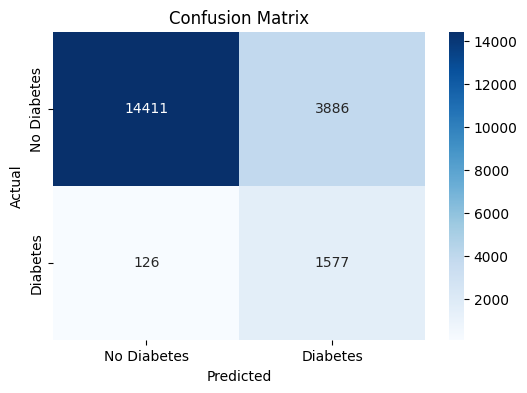

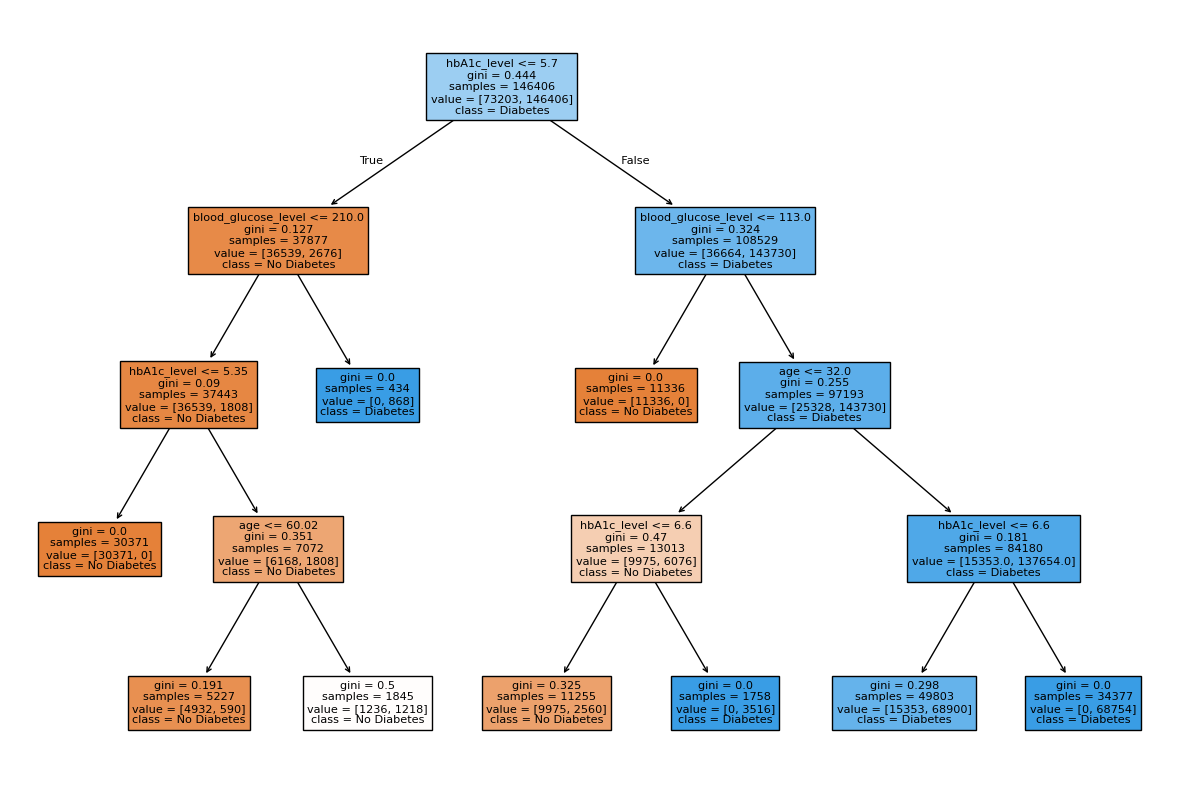

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
df = pd.read_csv(filename)  # No need for encoding issues with Excel files
df = df.drop(columns=['year', 'clinical_notes'])

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

clf = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight={0: 1, 1: 2} )
clf.fit(X_train_balanced, y_train_balanced)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

The output labels were very imbalanced with the vast majority of rows in the dataset being people without diabetes. To address this issue I used SMOTE data augmentation to synthetically create more diabetes data for the purpose of training the model. This significantly improved the results. Without balancing the model was only able to correctly identify diabetes patients 1137/1703 = 66.7 % of the time. When the data was balanced this became 1577/1703 = 92.6%!

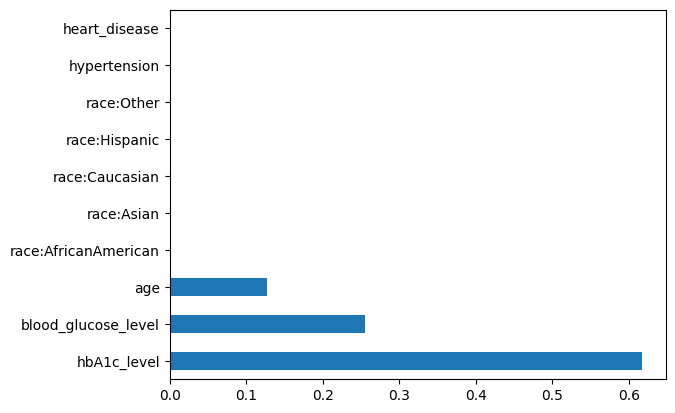

In [ ]:
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

These feature importances are interpreted as how much the feature decreases gini impurity, which is the default criterion for decision trees in sklearn. We see from the graph that hbA1c level and blood gluclose levels are the greatest predictors for diabetes risk. This makes sense as hbA1c levels and blood glucose levels are standard metrics used to diagnose diabetes. Age and bmi are also factors that the model assigns importance to which are also well known correlates with diabetes.